## Optima TB Introductory Workflow

This notebook demonstrates a basic introduction to working with Optima TB 

In [1]:
# IMPORTS
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
sys.path.append('..')
from optima_tb.project import Project
from optima_tb.utils import odict
from optima_tb.plotting import plotResult
from optima_tb.defaults import defaultOptimOptions
import optima_tb.plotting as oplt
import optima_tb.plotting2 as oplt2
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, HTML
from optima_tb.plotting2 import plotSeries, PlotData



Optima TB: a TB optimization and analysis tool
Copyright (C) 2017 by the Optima Consortium



First, we will specify the location of the cascade file and databook file we wish to operate on:

In [2]:
cascade = '../../tb-ucl-analyses/south_africa/Cascadespreadsheets/cascade_south_africa_art.xlsx'
databook = '../../tb-ucl-analyses/south_africa/Databookspreadsheets/databook_south_africa.xlsx'

Next, we instantiate a `Project` object, specifying the cascade we want to use

In [3]:
proj = Project(name = 'south_africa', cascade_path = cascade, plotting_level = 'dev', validation_level = 'avert')

25-05-18 20:16:46    INFO     Loading settings
25-05-18 20:16:46    INFO     Validation settings: avert
25-05-18 20:16:46    INFO     Loading plotting settings: dev
25-05-18 20:16:46    INFO     The cascade was validated successfully!
25-05-18 20:16:46    INFO     Created settings based on cascade: ../../tb-ucl-analyses/south_africa/Cascadespreadsheets/cascade_south_africa_art.xlsx
25-05-18 20:16:46    INFO     Created project: south_africa


After creating the `Project`, we need to load in the databook. Note that the databook is matched to the cascade, in that the quantities entered into the databook must correspond to the properties defined in the cascade. If you don't already have a databook, you can make one using the Project object:

In [4]:
proj.makeSpreadsheet(databook_path='test.xlsx', num_pops = 5, num_progs = 2)

25-05-18 20:16:46    INFO     Attempting to create databook test.xlsx


Note that the number of populations and programs is fixed at the time the databook is created. It's difficult to change these afterwards because a lot of cells are automatically filled with formulas referring to other cells. 

After filling out the databook, you can then load in it using `loadSpreadsheet`:

In [5]:
proj.loadSpreadsheet(databook_path = databook)

25-05-18 20:16:47    INFO     Attempting to load databook ../../tb-ucl-analyses/south_africa/Databookspreadsheets/databook_south_africa.xlsx
25-05-18 20:16:48    WARNING  Please verify databook under Parameter: spd_infxness and population 0-4 as a number greater than 1 or negative number was entered for definition type "fraction" for Year: 2000, value entered: 11.0
25-05-18 20:16:48    WARNING  Please verify databook under Parameter: spd_infxness and population 15-64 as a number greater than 1 or negative number was entered for definition type "fraction" for Year: 2000, value entered: 6.5
25-05-18 20:16:48    WARNING  Please verify databook under Parameter: spd_infxness and population 15-64 (HIV+) as a number greater than 1 or negative number was entered for definition type "fraction" for Year: 2000, value entered: 3.4
25-05-18 20:16:48    WARNING  Please verify databook under Parameter: spd_infxness and population Prisoners as a number greater than 1 or negative number was entered for

As discussed in the training presentation, the `Project` is the main container for a country application.

In [6]:
# List of Project attributes
proj.__dict__.keys()

['name',
 'settings',
 'results',
 'scenarios',
 'parsets',
 'progsets',
 'data',
 'uid']

Loading the spreadsheet into the project will populate the `data` property

In [7]:
proj.data.keys()

['meta', 'pops', 'contacts', 'transfers', 'progs', 'characs', 'linkpars']

The project data exactly corresponds to what is entered in the databook

In [12]:
# Current population count entered for Gen 0-4
proj.data['characs']['alive']['0-4']

y_format:	number
t:	[2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011.
 2012. 2013. 2014. 2015. 2016.]
y:	[ 734406.5  777011.   819615.5  862220.   904824.5  947429.   990033.5
 1032638.  1072333.  1112028.  1151723.  1191418.  1231113.  1270808.
 1310503.  1350198.  1389893. ]
y_factor:	1.0



Although the data has been loaded, no parameter sets have been created yet. The next step to run a simulation is to make a parset

In [14]:
parset = proj.makeParset(name='default');

25-05-18 20:18:29    INFO     Created ParameterSet: default


You can use the label of the parset to identify it later on. If a parset with that name already exists, it will be overwritten.

The `Parset` is the primary way to interact with parameter values going into the model that are explicitly specified. The two points at which this interaction usually takes place are

- Calibration, when the parameter y-factors are changed to achieve the best possible fit to data
- Scenarios, when new specific values are explicitly provided in order to test the effect of changing parameters

The most useful function to directly interact with a `Parset` is probably the `getPar` method, which returns an individual parameter:

In [17]:
parset.getPar('v_rate')

Parameter: v_rate

t
0-4:	[2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009.]
5-14:	[2000.]
15-64:	[2000.]
65+:	[2000.]
15-64 (HIV+):	[2000.]
65+ (HIV+):	[2000.]
Prisoners:	[2000.]
Prisoners (HIV+):	[2000.]
HCW:	[2000.]
HCW (HIV+):	[2000.]
Miners:	[2000.]
Miners (HIV+):	[2000.]

y
0-4:	[0.445      0.         0.         0.         0.         0.
 0.49289065 0.4995     0.5        0.5       ]
5-14:	[0.]
15-64:	[0.]
65+:	[0.]
15-64 (HIV+):	[0.]
65+ (HIV+):	[0.]
Prisoners:	[0.]
Prisoners (HIV+):	[0.]
HCW:	[0.]
HCW (HIV+):	[0.]
Miners:	[0.]
Miners (HIV+):	[0.]

y_format
0-4:	fraction
5-14:	fraction
15-64:	fraction
65+:	fraction
15-64 (HIV+):	fraction
65+ (HIV+):	fraction
Prisoners:	fraction
Prisoners (HIV+):	fraction
HCW:	fraction
HCW (HIV+):	fraction
Miners:	fraction
Miners (HIV+):	fraction

y_factor
0-4:	1.0
5-14:	1.0
15-64:	1.0
65+:	1.0
15-64 (HIV+):	1.0
65+ (HIV+):	1.0
Prisoners:	1.0
Prisoners (HIV+):	1.0
HCW:	1.0
HCW (HIV+):	1.0
Miners:	1.0
Miners (HIV+):	1.0


Note that the parameter specifies values in every population, so if you want to make changes to the parameter, you need to also specify which population you are modifying.

Now that we have a parset, we can run a simulation. To run a basic simulation, all we need to specify is the name of the parset: 

In [18]:
par_results = proj.runSim(parset_name='default')

25-05-18 20:29:35    INFO     Initiating a standard run of project "south_africa" (i.e. without the influence of programs).
25-05-18 20:29:37    INFO     Elapsed time for running south_africa model: 2.392 s


A `ResultSet` object is returned from the `runSim` function. In addition, that object is saved in the Project:

In [19]:
proj.results.keys()

['parset_default']

That way, you can retrieve previous results from the Project if you didn't retain them when the simulation was run. 

We can now plot the result. See the Plotting documentation for full details:

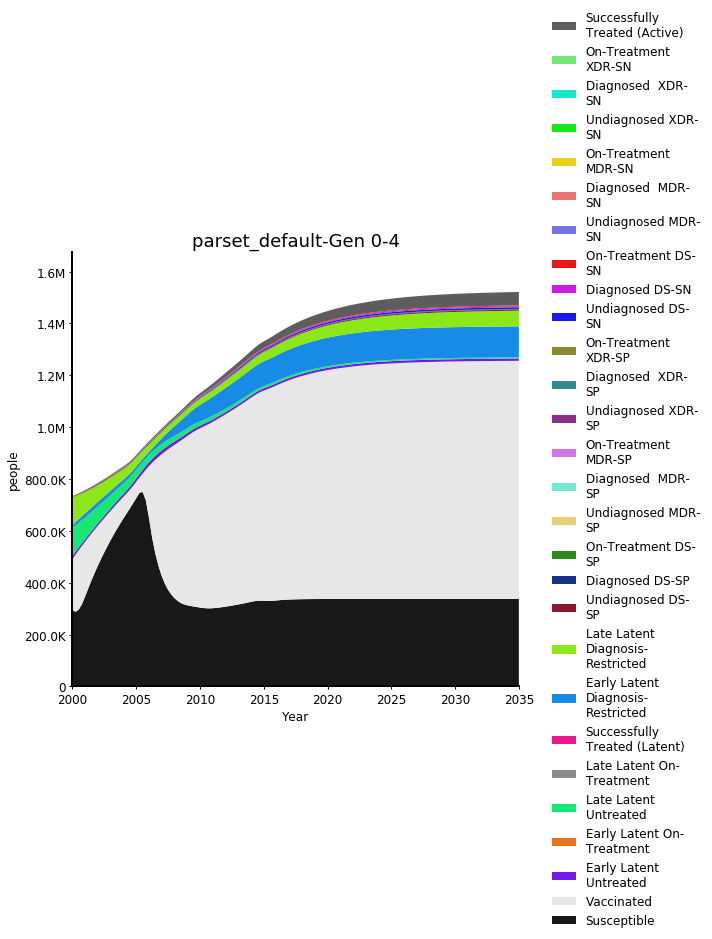

In [21]:
d = PlotData(par_results,pops='0-4',project=proj)
plotSeries(d,plot_type='stacked');

Calibration typically starts with trying to match the demographics. The first step is to plot the population sizes and compare them to the data provided:

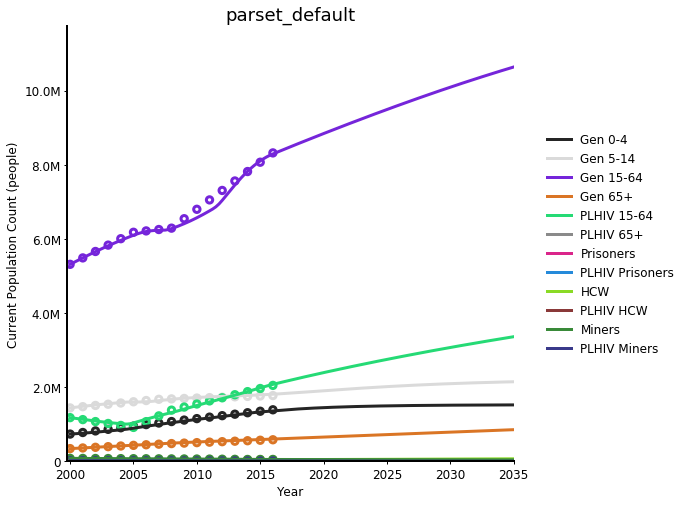

In [24]:
d = PlotData(par_results,outputs='alive',project=proj)
plotSeries(d,axis='pops',data=proj.data);

This calibration already looks quite good. To change the calibration manually, set the y-factors for the parameters you want to change. For example, to increase the birth rate:

25-05-18 20:33:39    INFO     Initiating a standard run of project "south_africa" (i.e. without the influence of programs).
25-05-18 20:33:41    INFO     Elapsed time for running south_africa model: 2.338 s


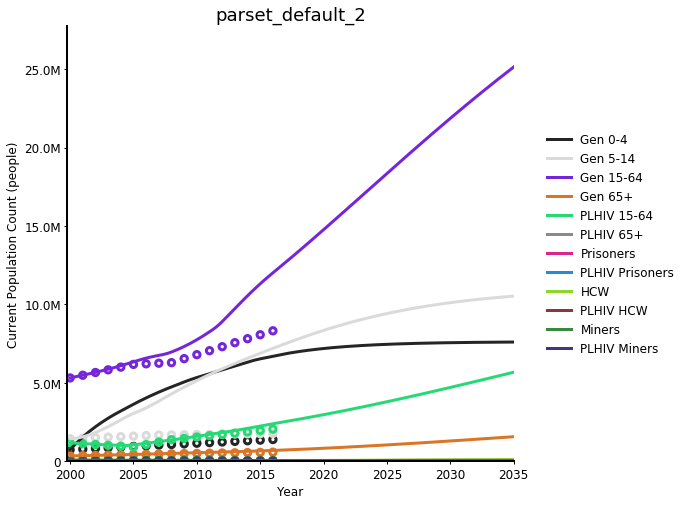

In [30]:
parset.getPar('b_rate').y_factor['0-4'] = 5.0
results = proj.runSim(parset_name='default')
d = PlotData(results,outputs='alive',project=proj)
plotSeries(d,axis='pops',data=proj.data);

As expected, the number of people in total has increased. you can also modify the transfer parameters that move people from one population to another e.g. due to aging

25-05-18 21:26:40    INFO     Initiating a standard run of project "south_africa" (i.e. without the influence of programs).
25-05-18 21:26:42    INFO     Elapsed time for running south_africa model: 2.230 s


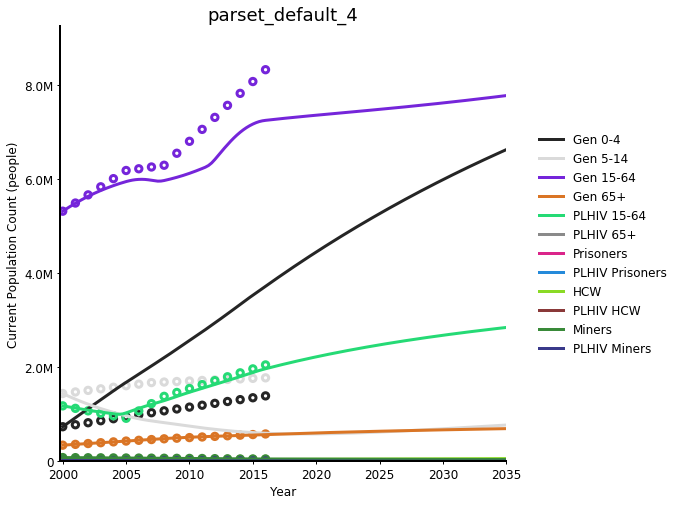

In [38]:
parset.getPar('b_rate').y_factor['0-4'] = 1.0
parset.transfers['aging']['0-4'].y_factor['5-14']=0.1
results = proj.runSim(parset_name='default')
d = PlotData(results,outputs='alive',project=proj)
plotSeries(d,axis='pops',data=proj.data);

As expected, decreasing the aging rate means people remain in `0-4` for too long, so that population size increases greatly while subsequent populations (`5-14`, `15-64`) become too small.

Automated calibration is also available. The algorithm is a bit fiddly and does tend to get stuck in local minima. It performs best if you only try to automatically calibrate a small number of parameters, and if you perform a manual calibration first to get in the right ballpark. 

To perform a manual calibration, first make a list of all of the parameters you want to adjust. For each parameter, you need to specify 

- The population. If you set the population to `None` then it will automatically adjust the y-factor for each population independently. If you set the population to `'all'` then it will automatically adjust a single y-factor that is used for all populations
- The lower and upper bounds. Don't forget that these are bounds on the scaling factor that multiplies the parameter value, not the parameter value itself. In particular, if the parameter has been entered in the databook with an assumption of `0.0` then it will always be zero regardless of the y-factor

In [33]:
pars_to_adjust = []
pars_to_adjust.append(('b_rate', '0-4', 0.01, 100)) # Birth rate
pars_to_adjust.append(('doth_rate', 'all', 0.01, 100)) # Death rate

Next, you need to specify which outputs from the model should be used to quantify the goodness of fit. The output from the model should be something for which data has been entered. In general, the outputs that you are already plotting to manually examine the calibration are good choices. So for our example, the `alive` characteristic would be appropriate to use. For each output, you need to specify

- The label of the output (e.g. `alive`)
- The population
- A weighting factor. This weight adjusts the relative contribution of this output to the overall objective. You could set different weight factors for different outputs, or for different populations, or both
- A fit score function that turns the model and target parameter values into a fit score. The 'fractional' method returns the difference between the values, divided by the data value. This way, differences in the absolute size don't drive the fit - for example, the fact that the `15-64` population is much larger than the others won't cause it to dominate the calibration

In general, it's probably fine to leave the weighting factor as `1.0` and to use the `fractional` fit score function unless you encounter specific difficulties. 

In [34]:
output_quantities = []
for pop in parset.pop_labels:
    output_quantities.append(('alive',pop,1.0,"fractional"))

Finally, you can run the calibration using the `performAutofit` function, which takes in a `Parset` and returns a new `Parset`

In [39]:
from optima_tb.calibration2 import performAutofit
calibrated_parset = performAutofit(proj, parset, pars_to_adjust, output_quantities,max_time=10)

25-05-18 21:26:48    INFO     Initiating a standard run of project "south_africa" (i.e. without the influence of programs).
25-05-18 21:26:50    INFO     Elapsed time for running south_africa model: 2.234 s
25-05-18 21:26:50    INFO     Initiating a standard run of project "south_africa" (i.e. without the influence of programs).
25-05-18 21:26:52    INFO     Elapsed time for running south_africa model: 2.360 s
25-05-18 21:26:52    INFO     Initiating a standard run of project "south_africa" (i.e. without the influence of programs).


     step 1 (2.4 s) -- (orig: 30.241 | best:30.241 | new:32.394 | diff:2.1530)


25-05-18 21:26:55    INFO     Elapsed time for running south_africa model: 2.290 s
25-05-18 21:26:55    INFO     Initiating a standard run of project "south_africa" (i.e. without the influence of programs).


     step 2 (4.7 s) -- (orig: 30.241 | best:30.241 | new:30.949 | diff:0.70771)


25-05-18 21:26:57    INFO     Elapsed time for running south_africa model: 2.451 s
25-05-18 21:26:57    INFO     Initiating a standard run of project "south_africa" (i.e. without the influence of programs).


     step 3 (7.1 s) -- (orig: 30.241 | best:30.241 | new:33.445 | diff:3.2038)


25-05-18 21:27:00    INFO     Elapsed time for running south_africa model: 2.531 s
25-05-18 21:27:00    INFO     Initiating a standard run of project "south_africa" (i.e. without the influence of programs).


     step 4 (9.7 s) -- (orig: 30.241 | best:30.241 | new:32.505 | diff:2.2640)


25-05-18 21:27:02    INFO     Elapsed time for running south_africa model: 2.428 s


     step 5 (12.1 s) ++ (orig: 30.241 | best:30.241 | new:27.977 | diff:-2.2640)
===  Time limit reached (12.133 > 10.000) (5 steps, orig: 30.241 | best: 27.977 | ratio: 0.92514) ===
b_rate - 0-4, scale=0.90
doth_rate - 0-4, scale=1.00
doth_rate - 15-64, scale=1.00
doth_rate - 15-64 (HIV+), scale=1.00
doth_rate - 5-14, scale=1.00
doth_rate - 65+, scale=1.00
doth_rate - 65+ (HIV+), scale=1.00
doth_rate - HCW, scale=1.00
doth_rate - HCW (HIV+), scale=1.00
doth_rate - Miners, scale=1.00
doth_rate - Miners (HIV+), scale=1.00
doth_rate - Prisoners, scale=1.00
doth_rate - Prisoners (HIV+), scale=1.00
parset.getPar('b_rate').y_factor['0-4']=0.90
parset.getPar('doth_rate').y_factor['0-4']=1.00
parset.getPar('doth_rate').y_factor['15-64']=1.00
parset.getPar('doth_rate').y_factor['15-64 (HIV+)']=1.00
parset.getPar('doth_rate').y_factor['5-14']=1.00
parset.getPar('doth_rate').y_factor['65+']=1.00
parset.getPar('doth_rate').y_factor['65+ (HIV+)']=1.00
parset.getPar('doth_rate').y_factor['HCW']=1.0

The automated calibration has reduced the birth rate. Let's compare the size of the `0-4` compartment before and after calibration

In [ ]:
parset.getPar('b_rate').y_factor['0-4'] = 1.0
parset.transfers['aging']['0-4'].y_factor['5-14']=0.1
results = proj.runSim(parset_name='default')
d = PlotData(results,outputs='alive',project=proj)
plotSeries(d,axis='pops',data=proj.data);